# How is people's riding time with shared bikes assciated with where they rent the bike and their subscription status in San Francisco?

## Introduction

Nowadays, carbon emission and greenhouse gases are one of the most serious problem for improving our environment. With the policy interventions from the governments and media’s advertising, more and more people choose to use public transportation to travel around, including buses, subways and public shared bikes. In 2019, Soltani et al. published a research for people’s travel behaviour of using these shared- bikes. They found that compare to female population, male populations are more dominated to this shared system especially the younger male populations. Also, when research for the most used period in a day, surprisingly people prefer riding in the afternoon compare to in the morning. (Soltani et al., 2019) Another article published by Zhang el al. focused on the prediction of the shared- bike usage and their trips. The article used Big- Data from the shared- system from different cites, analysis people’s behaviour when using shared- bike system, then construct several models to predict which station people use the most, which duration time do people prefer, and therefore how should the shared- bike companies design their subscription plan for their members etc… Their research not only benefit for the company of the shared- bikes, it also benefits the design of the cities and people’s life, with the company improves their stations, specifically on how many bikes to put in a station, where should the company puts more station in the city, people can borrow public shared- bikes easier and the problem of carbon emission — a part of global warming can be solved (Zhang et al., 2016).
    
    
In this paper, we will discuss how does where is the start station, people’s subscription status with their shared- bike company and how does the bike id affect people’s duration in San Francisco, the U.S.. We will first introduce our data, and then build linear regressions to find the relationship between duration and the variables I listed above, in the end, we will use a regression tree to make a predication of people’s behaviour in future ridings. In our paper, we are combining what above two articles did, first find out how people behaviour using public shared- bikes like the 2019 article by Soltani et al. and then using OLS regressions and machine learnings to construct the model for predictions in future like the second article by Zhang et al. in 2016. 

## Project 1

### Importing Data

In [53]:
import pandas as pd
import numpy as np
!pip install qeds
import qeds
%matplotlib inline

In [68]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
!pip install linearmodels
!pip install folium
import folium
from folium import plugins
from linearmodels.iv import IV2SLS

### Summary Statistics

In [61]:
#Read the trip file as DataFrame use np.funtions. 
trip = pd.read_csv("trip.csv")
stations_df = pd.read_csv("station.csv")

#Select zip_code, duration time and subscription status columns from the trip file.
Xs_and_Y = trip[['zip_code', 'duration', 'subscription_type']]
#Looking at the types of each columns, prep for the summary statistics. 
Xs_and_Y.info()

#Print summary statistics for Xs and Y by their type. 
print(Xs_and_Y.describe(include=[object])  )
print (Xs_and_Y.describe(include=[np.number]))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669959 entries, 0 to 669958
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   zip_code           663340 non-null  object
 1   duration           669959 non-null  int64 
 2   subscription_type  669959 non-null  object
dtypes: int64(1), object(2)
memory usage: 15.3+ MB
       zip_code subscription_type
count    663340            669959
unique     7439                 2
top       94107        Subscriber
freq      78704            566746
           duration
count  6.699590e+05
mean   1.107950e+03
std    2.225544e+04
min    6.000000e+01
25%    3.440000e+02
50%    5.170000e+02
75%    7.550000e+02
max    1.727040e+07


In [58]:
trip

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
...,...,...,...,...,...,...,...,...,...,...,...
669954,432951,619,9/1/2014 4:21,Powell Street BART,39,9/1/2014 4:32,Townsend at 7th,65,335,Subscriber,94118
669955,432950,6712,9/1/2014 3:16,Harry Bridges Plaza (Ferry Building),50,9/1/2014 5:08,San Francisco Caltrain (Townsend at 4th),70,259,Customer,44100
669956,432949,538,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:14,5th at Howard,57,466,Customer,32
669957,432948,568,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:15,5th at Howard,57,461,Customer,32


##### From summary statistics, there are two types of data: 

Duration contains duration time for every trips in unit of second, so its a "number" type of data, and the summary statisitc presents how many observations there are, the mean, std, max and so on. 

Zip-code and subscription_type are object type of data. Although zip-code is a collection of numbers in order, it means nothing to calculate the mean and the std, it only presents where do people live. Therefore we only count them and we can see there are 663340 people registered their home address in the system and there are total 7439 unique zip-code in the system. The one has been registered the most of zip-code in 94107, maybe there are more bike station near that location, or maybe just people around there like biking. 
Subscription_type is a dummy variable, like mentioned in the introduction, it only says if the person subscript or not in the past trips and we can see that in this data set, there are more people subscript in the system. 

### Graphs with Analysis 

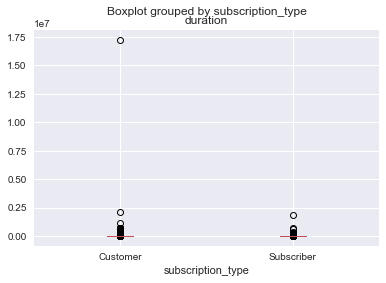

In [75]:
boxplot_st = Xs_and_Y.boxplot(column = "duration", by = "subscription_type")

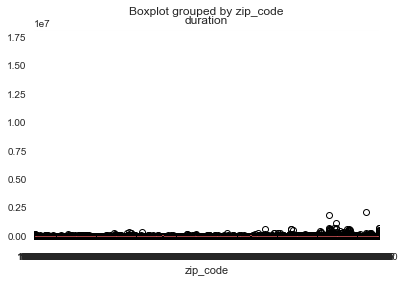

In [56]:
boxplot_zip = Xs_and_Y.boxplot(column='duration', by = 'zip_code')  

<AxesSubplot:xlabel='subscription_type', ylabel='duration'>

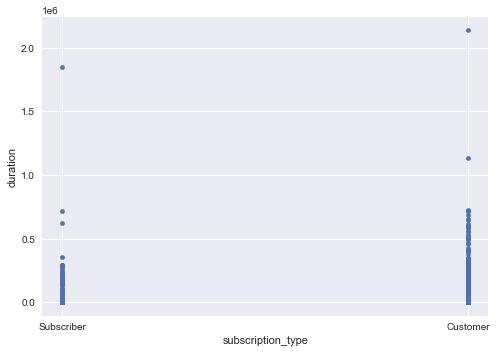

In [11]:
plt.style.use('seaborn')

trip_1 = trip.set_index("id")
trip_1 = trip_1.drop(568474)

trip_1.plot(x='subscription_type', y='duration', kind='scatter')

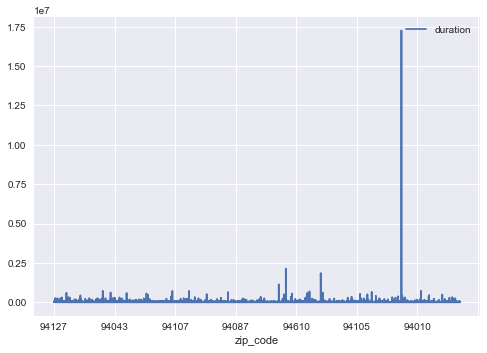

In [14]:
lines = Xs_and_Y.plot.line(x='zip_code', y='duration')

#### Why choose these two variables with duration time?

It interests me of how bike sharing companies are manage their business, zip-code is no doubt one of the most important elements when considering operate the business, therefore, by looking at the data of zip-code, we may guess where does this company want to foucs the most (there might has more stations, maybe at the center of the city...) or maybe there is the only place they can operate because of competition. By looking at the relationship of the duration and subscription, it tells us how people behave when it comes to buy the pass or not, so the company may consider to switch their strategies if there are more people using the one-time purchase. It is interest to see above results because that is not exactly I would expect. 

## Project 2

I missed Project 2 for some medical reasons. 

## Project 3

### Part One - Reflecting on Project Two

I missed Project Two because of some medical reasons, therefore I can not really make any changes to improve my introduction from the previous project. But I want to try to improve my first section from Project 1 as a compensation. I also fix some formatting issues that TA pointed out from the comments in Project 1.


### Part Two - Adding more information to support the research question

#### Section One ---Available web-scraping dataset

(1) Why I picked this data? 

One of the question I am trying to solve is the relationship between duration time and zipcode. The orignal datasets from my topic only contains numerical zip code, but zip code are designed in constant distance. When people ride bikes, how their city are designed, how crowded are the cities (how much people are on the street), and the conditions of the roads (whether that city has enough funds to fix the roads) will all influence people's duration time. Therefore, different city has different city plans with city's economic status. Maybe some cities are just richer than the others, therefore, roads are earier to ride and there will be specific roads for bikes to travel, not riding bikes on the side ways.

Also, given an example, suppose two people all want to travel from one zip code area to another, and the direct distance shows on the map are the same. However, supose A lives in San Jose, and Be lives in Brisbane, which is a much smaller and few population town. Thus, the probability of B gets to his destination faster is bigger than A's, since there might be more people on the street that A needs to pay more attention to. Or, it can be the opposite, that in San Jose, there are more stations, so A can return his bike faster compare to B, that B need to search for a longer time, and ride further to do that.

Thus, including city and its population, area of the city will be some good independents variables can be added into the analysis, and it can make more precise results for the final conclusion. 

(2) Where I can get the data from? 
https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_the_San_Francisco_Bay_Area

(3) How you are going to merge the data with your results and how you are going to use this new infomation in answering your research question. 

I want to first set cities to each zip code, this way, I can merge my old dataset with my new scarping one. Thus, i can reaseach the duation time and subscription status city by city according to each cities'  populations and area to except more outliers will influence people's riding speed. Try to better explain, maybe it is not this person's speed is slower than the other one, maybe it just this city has less stations and more difficult rodas. 


#### Section Two ----Posibility of using this data source

(1) Frequency of running program. 

I do not need to run over my program over time. The reason we are using the new dataset is we want to category our two dataset according to the location, and location (name of the cities) does not change that much. Also, the old dataset was from 2013-2017, the new dataset was last updated from 2020. Therefore, we do not need to run over my programs over time, what is in the dataset is already enough.


(2) Possibility to use this dataset to add more information to solve the problem.

I can scrape the table I need from this webiste I listed above. 

#### Section Three -- Scraping the Data

In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# I am importing the website here and see if it response to my scrape. 
web_url = ' https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_the_San_Francisco_Bay_Area'
response = requests.get(web_url)

In [105]:
# Creating a soup_object using beautifulsoup
soup_object = BeautifulSoup(response.content)

In [102]:
# Using the Soup_object to locate the table on the webiste.
data_table = soup_object.find_all('table','wikitable plainrowheaders sortable')[0]

In [103]:
#Lacate where are infomations start with
all_values = data_table.find_all('tr')

#Testing my location
all_values[2].find_all('th')

[<th scope="row"><a href="/wiki/Alameda,_California" title="Alameda, California">Alameda</a>
 </th>]

In [107]:
# Create an empty dataframe
Locations = pd.DataFrame(columns = ['Name','Type','County','Population','Land Area (sq_mi)','Land Area (Km squared)']) 
ix = 0 # Initialise index to zero

for row in all_values[2:]:
    values = row.find_all('th') # Extract all elements with tag <th>
    # Pick only the text part from the <th> tag
    Name = values[0].text
    Name = Name .strip('\n')
    values_2 = row.find_all('td')
    # Pick only the text part from the <td> tag, since information on the website has two types of tags in one row. 
    Type = values_2[0].text
    Type = Type .strip('\n')
    County = values_2[1].text
    County = County .strip('\n')
    Population = values_2[2].text
    Population = Population .strip('\n')
    Land_Area = values_2[3].text
    sq_mi = Land_Area .strip('\n')
    KM = values_2[4].text
    Km = KM.strip('\n')
# I only want 6 variables in that table, and I do not want the seventh,therefore, I am only scrape 6 here.
# Also move the '/n'from each data to make the table clear
    
    Locations.loc[ix] = [Name,Type,County,Population,sq_mi,Km] # Store it in the dataframe as a row
    ix += 1
    
# We can see the scraped table listed below and there are 100 of them.
Locations


,Name,Type,County,Population,Land Area (sq_mi),Land Area (Km squared)
0,Alameda,City,Alameda,"78,280",10.45,27.1
1,Albany,City,Alameda,"20,271",1.79,4.6
2,American Canyon,City,Napa,"21,837",6.09,15.8
3,Antioch,City,Contra Costa,"115,291",29.17,75.5
4,Atherton,Town,San Mateo,"7,188",5.02,13.0
...,...,...,...,...,...,...
96,Vallejo,City,Solano,"126,090",30.42,78.8
97,Walnut Creek,City,Contra Costa,"70,127",19.76,51.2
98,Windsor,Town,Sonoma,"26,344",7.44,19.3
99,Woodside,Town,San Mateo,"5,309",11.47,29.7


#### Section Four ---Merging findings from two data

In [100]:
zipcode_city_dict = dict()
zipcode_city_dict[95113] = 'San Jose'
zipcode_city_dict[94301] = 'Palo Alto'
zipcode_city_dict[94107] = 'San Francisco'
zipcode_city_dict[94063] = 'Redwood City'
zipcode_city_dict[94041] = 'Mountain View'

trip["city"] = trip.zip_code.apply(lambda x:zipcode_city_dict[x])

KeyError: '94127'

#### Section Five --- Visualization

#### Section Six --- Summary

I want to category the zip code to cities by merge two datasets. But what I find is it is difficult to identify which zip code is belong to which city. A city can have 20 different zip code since there are only 100 cities but 7439 different zip code. I tried to only use a few cities as examples, to maybe analyze only a few cities first, but it did not work from the above code.

Therefore, I will try to still match them in the final project, but for project 3, it is very hard to match them now, and therefore I can not merge them and show the visualization before and after adding in new dataset. 

# Final Project

## OLS Regression

### Section 1 -- Review Xs from previous Project

In my first project, I determined two xs: zip codes and subscription status (customer or subscriber) with my y: duration time. 

A linear relationship is described as a straight-line relationship between two variables. Thus, we will see if there is a straight line between my chose Xs and Y using the plots that I did in the Report 1.

I think the relationship (1) between duration time and subscription status should be linear, and the relationship (2) between duration time and zip codes whould be non-lineared. 

Based on the plots that I made from Project 1, we can clear see that customers averagly have longer duration time compare to subscriber -- Positive linear relationship. But for the relationship (2), if we plot a line graph, it will increase and suddenly decrease, since people use shared bikes more between zip code 94105 and 94010, resulting a trianglar shape of graph, a line polt that is connected by three points-- either a negative polynomial equation or a discontinuously graph, none of that is linearly. Hence, the relationship (2) is a non-linear relationship. 

### Section 2 -- Choose new Xs for estimation

(1) What we are choosing : subscription status, start station id, bike id.
- The goal of my estimations is finding the linear relationship between my Xs and Y. Therefore, we are going to explain my reasons based on the assumptions of linear regression. 

(2) Why I chose these Xs:
- For subscrption status, we discussed the relatioship in the section 1, that we can clearly see a positive linear relationship between duration time and Subscription status. Therefore, we include this variable into the estimation. 


- Instead of estimate the relationship between zip_code and duration, we can estimate the relationship more precisely into station id, which we know that people will always choose the closest station to rent the bike, zip code as we said in the Project 3, is too broad, not well-categoried data and hard to describe/ plot in the linear regressions. This, we will use the start station id to see, whether there is a relationship between duration time and start station id. Whether there is one station that is most popular, maybe the reason is there are more bikes to rent, or maybe that is where downtown is, or maybe people just like that station more. 


- We choose bike id is beacuse we want to see whether there is a relationship between how comfortable / age of the bike will influence people's duration time. Taking shared bikes in Toronto as an example because I am a subscriber of the shared system, every time I will pick the bike that looks like more new and I will test if the weels are full of gas and if the seat is at the height that fit me more. Thus, if we assume that the shared bike company check their bikes once a month, then there will be a difference in different bikes every month, and this will result people's duration time. For example, for me, if I ride a uncomfortable bike today, I will choose to re-rent my bike at the next station, thus, the average duration time of that uncomfortable bike will be short, which should result as a linear relationship between bike id and duration time. 


- According the Xs above, I think above 3Xs all can explain y well if we interpret individual of them, and if we put them together, we should get a more detail estimation of how they together explain y. 

### Section 3 -- Regression Models

We want to use single/ multiple linear regressions to esitmate regression coefficients below. 

$$
\widehat{Duration Time} = constant + \hat{\beta}_1 \ {subscription status}
$$

$$
\widehat{Duration Time} = constant + \hat{\beta}_2 \ {start_station_name}
$$

$$
\widehat{Duration Time} = constant + \hat{\beta}_3 \ {bike_id}
$$

$$
\widehat{Duration Time} = constant + \hat{\beta}_4 \ {subscription_status} + \hat{\beta}_5 \ {start_station_name}
$$

$$
\widehat{Duration Time} = constant + \hat{\beta}_6 \ {subscription_status} + \hat{\beta}_7 \ {start_station_name} + \hat{\beta}_8 \ {bike_id}
$$

In [17]:
#Covert subscription_type into dummy variable.

def getDum(string):
    if string == 'Customer':
        return 0 
    else:
        return 1
    
trip["subscription_type"] = trip["subscription_type"].apply(getDum)
trip

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,const
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,1,94127,1
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,1,95138,1
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,1,97214,1
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,1,95060,1
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,1,94103,1
...,...,...,...,...,...,...,...,...,...,...,...,...
669954,432951,619,9/1/2014 4:21,Powell Street BART,39,9/1/2014 4:32,Townsend at 7th,65,335,1,94118,1
669955,432950,6712,9/1/2014 3:16,Harry Bridges Plaza (Ferry Building),50,9/1/2014 5:08,San Francisco Caltrain (Townsend at 4th),70,259,0,44100,1
669956,432949,538,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:14,5th at Howard,57,466,0,32,1
669957,432948,568,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:15,5th at Howard,57,461,0,32,1


In [15]:
## At the first part of this question, we will first run 3 single linear regression to see how does these three
## varibles fit the model by itselvies, then in the next part, we will run other 2 multiple regressions to 
## see if these 2 models fit the model better.

# Add constant term to dataset
trip['const'] = 1

# Create lists of variables to be used in each regression
X1 = ['const', 'subscription_type']
X2 = ['const', 'start_station_id']
X3 = ['const', 'bike_id']


# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(trip['duration'], trip[X1], missing='drop').fit()
reg2 = sm.OLS(trip['duration'], trip[X2], missing='drop').fit()
reg3 = sm.OLS(trip['duration'], trip[X3], missing='drop').fit()

from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}"}


results_table = summary_col(results=[reg1,reg2,reg3],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'subscription_type',
                                             'start_station_id',
                                             'bike_id'])


results_table.add_title('Table 1 - OLS Regressions -- Single regressions')

print(results_table)

  Table 1 - OLS Regressions -- Single regressions
                    Model 1    Model 2    Model 3  
---------------------------------------------------
const             3951.76***  1697.73*** 1250.79***
                  (69.17)     (95.86)    (80.50)   
subscription_type -3361.71***                      
                  (75.21)                          
start_station_id              -10.19***            
                              (1.59)               
bike_id                                  -0.33*    
                                         (0.18)    
R-squared         0.00        0.00       0.00      
R-squared Adj.    0.00        0.00       0.00      
R-squared         0.00        0.00       0.00      
No. observations  669959      669959     669959    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [17]:
# In this part, we will estimate multiple regression model

X4 = ['const', 'subscription_type', 'start_station_id']
X5 = ['const', 'subscription_type', 'start_station_id', 'bike_id']

reg4 = sm.OLS(trip['duration'], trip[X4], missing='drop').fit()
reg5 = sm.OLS(trip['duration'], trip[X5], missing='drop').fit()

from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}"}


results_table = summary_col(results=[reg4,reg5],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 4',
                                         'Model 5',],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'subscription_type',
                                             'start_station_id',
                                             'bike_id'])


results_table.add_title('Table 2 - OLS Regressions -- Multiple Regressions')

print(results_table)

Table 2 - OLS Regressions -- Multiple Regressions
                    Model 4     Model 5  
-----------------------------------------
const             4311.49***  4341.65*** 
                  (112.35)    (124.93)   
subscription_type -3345.50*** -3345.76***
                  (75.31)     (75.31)    
start_station_id  -6.46***    -6.23***   
                  (1.59)      (1.64)     
bike_id                       -0.10      
                              (0.18)     
R-squared         0.00        0.00       
R-squared Adj.    0.00        0.00       
R-squared         0.00        0.00       
No. observations  669959      669959     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


### Section 4 -- Reasons for estimation


- First of all, since in the previous, we only made guess of if the Xs I picked will help estimate Y, therefore, we need to test them, more specifically test the corresponding coefficients to see whether they are significant -- can corrlated with Y. The equations are listed in the top of the Section 3. 


- By Model 1, 2, 3, we can see Beta 1 and Beta 2 are highly significant, but not Beta 3, this means the bike id probabily can not explain duration very well. 


- Then we did two multiple regressions, which I want to know how can all the Xs explain Y. When we view Model 4, we can see all the coefficients are highly significant, but not in Model 5. By this result, we further proved that we should not include bike id as a X variable. We may conclude that in these five regressions, Model 4 can mostly explain the Y. 

### Section 5 -- Best specification

I will choose Model 5 as my preferred specification. A part of the reason is like what I mentioned in the Section 4, that all the coefficients are significant and althuogh my R-squared value in all 5 of the regressions are very low (the above estimation rounded the number to zero, but I did some individual regression result, they are like 0.003 - 0.005 around), which means my estimation equation may not fit my data, hence in the future, I may need to try non-linear regressions. But still, although 5 of them are all have very low R-squared, I will still choose the regression that has the more X variables correlated with Y and with highly significant with the cofficient. 

### Section 6 -- Interpretations and evaluations

- The measures I will use to assess the performance of my regressions are R-squared, AIC, BIC. Since in the above estimation results we do not have AIC and BIC, I did some more detailed estimation below. 

- The estimation I did above are all in low qualities. But among 4 regressions below, regressions for Model 1 and Model 4 has the highest R-squared value. And all the regression are having very high AICs and BICs, which means my estimations are not good. 

#### Interpretations:

- Model 1: For one unit increase in subscription type (which is switch from customer to subscriber) is associated with a decrease in duration time of 3951.76 seconds average. 


- Model 2: For one unit change in start station id is associated with a change in duration time of 1697.73 seconds average. 


- Model 3: For one unit change in bike id is associated with a change in duration time of 1250.79 seconds average. 


- Model 4: Holding other variables constant, for one unit increase in subscription type is associated with a decrease in duration time of 3345.5 seconds average. Holding other variables constant, for one unit change in start station id is associated with a change in duration time of 6.46 seconds average.


- Model 5: Holding other variables constant, for one unit increase in subscription type is associated with a decrease in duration time of 4341.65 seconds average. Holding other variables constant, for one unit change in start station id is associated with a change in duration time of 6.23 seconds average. Holding other variables constant, for one unit change in bike id is associated with a change in duration time of 0.10 seconds average.

** All the changes above are descrrbed in negative relationship, which is one unit increase in x is associated with a unit of decrease in Y. 

In [26]:
trip['const'] = 1

reg1 = sm.OLS(endog=trip['duration'], exog=trip[['const', 'subscription_type']], \
    missing='drop')

reg2 = sm.OLS(endog=trip['duration'], exog=trip[['const', 'bike_id']], \
    missing='drop')

reg3 = sm.OLS(endog=trip['duration'], exog=trip[['const', 'start_station_id']], \
    missing='drop')

reg4 = sm.OLS(endog=trip['duration'], exog=trip[['const', 'start_station_id','subscription_type']], \
    missing='drop')

results_1 = reg1.fit()
results_2 = reg2.fit()
results_3 = reg3.fit()
results_4 = reg4.fit()

print(results_1.summary(),results_2.summary(),results_3.summary(),results_4.summary())

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1998.
Date:                Fri, 15 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:38:26   Log-Likelihood:            -7.6562e+06
No. Observations:              669959   AIC:                         1.531e+07
Df Residuals:                  669957   BIC:                         1.531e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3951.7613     69.17

### Section 7 -- What have been learned

1. With all 5 regressions above, we can conclude that bike id is not a good X variable to include in the estimation, which in the next time, we will try other variables. 

2. From Model 1-4, we can indeed conclude that start station id and subscription type can well explain Y, since the coefficients are highly significant, but because of the low R-squared and very hgih AIC and BIC, we need to try different equations/types of regressions to estimate the relationship between duration and subscription tyep/ start station id.  


## Machine Learning


### Section 2

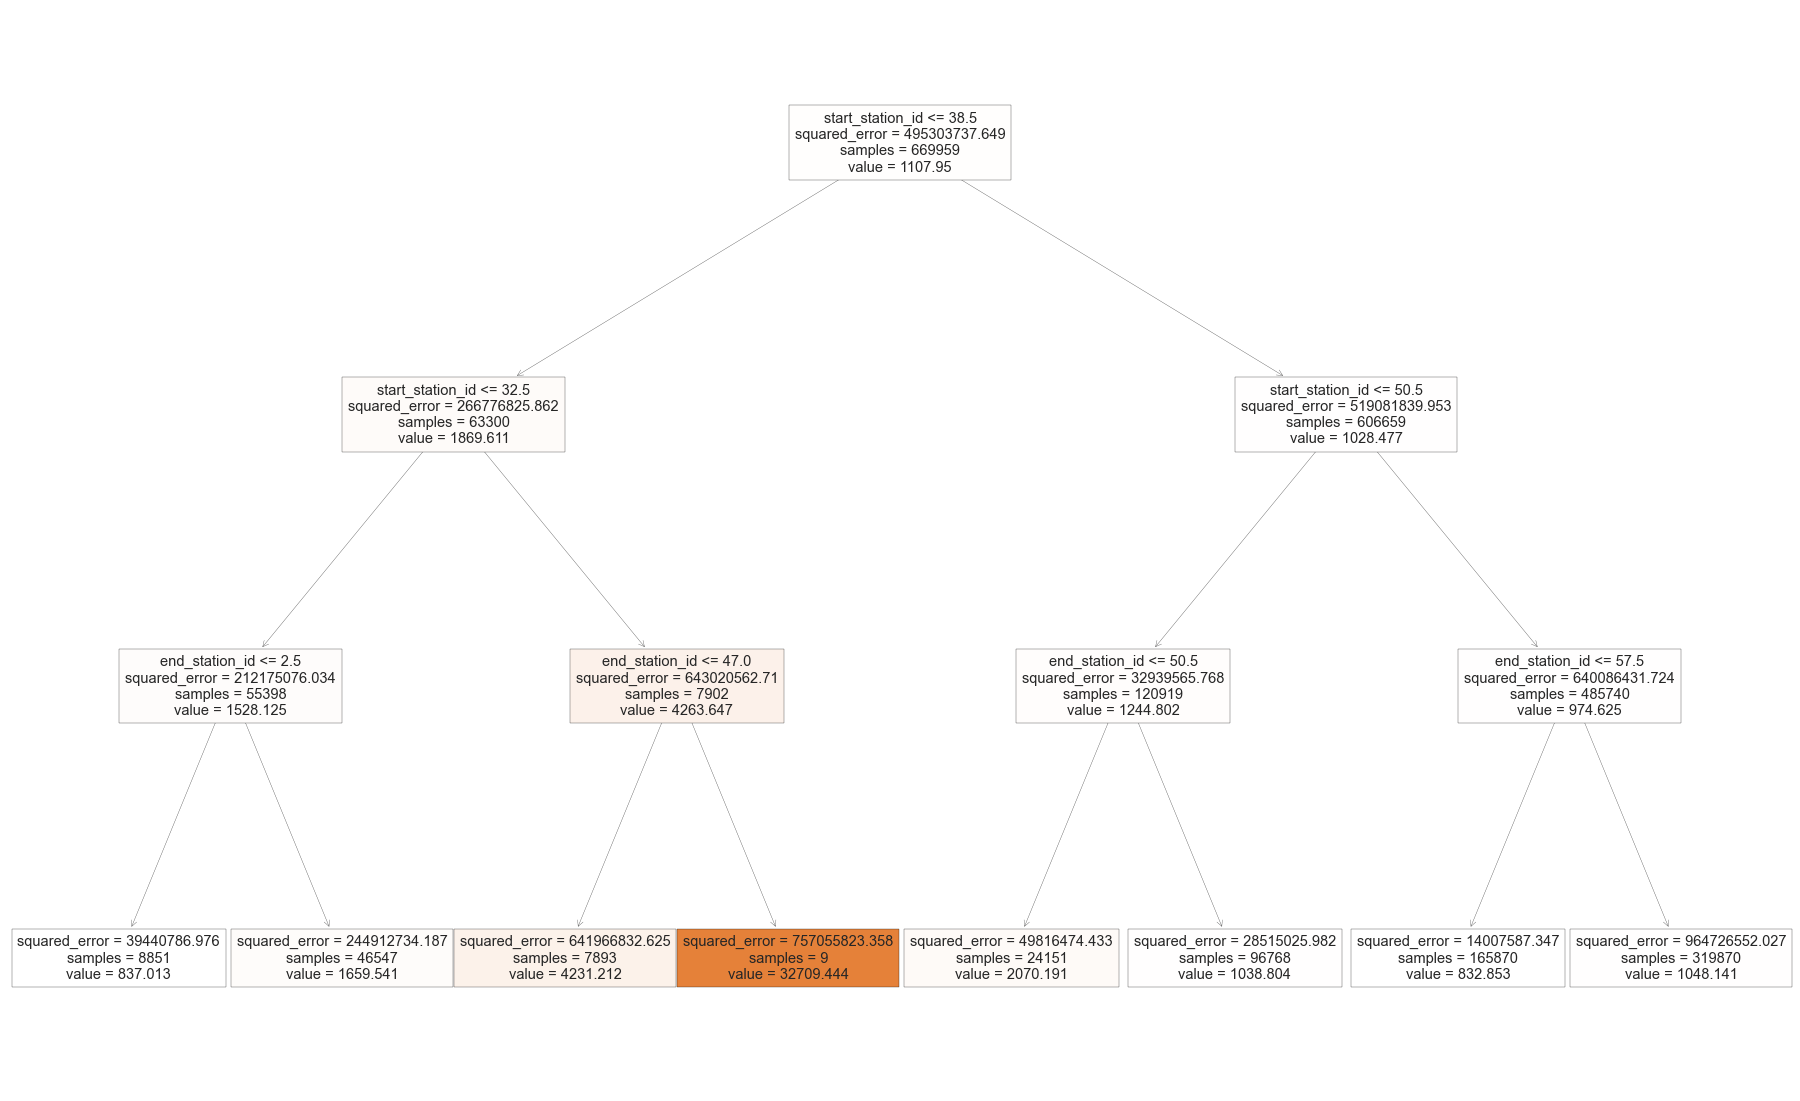

In [32]:
import seaborn as sns
from sklearn import tree

# My variables:start_station_id, subscription_type, bike_id
## We will not include bike id here since at OLS regression part that we claimed it is not a good estimator. 

#My variables:
X = trip[["start_station_id", "end_station_id", "bike_id"]]
y = trip[["duration"]]

sqft_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X,y)
sqrf_fig = plt.figure(figsize=(32,20))
sqrf_fig = tree.plot_tree(sqft_tree, feature_names=X.columns, filled=True)

### Section 3

- This objective function studies how start location, end loction and bike ID may influence the duration of the trip.


- In the code above, "max_depth" is the the regularisation parameter, if we increase it, the depth of the tree will increase and the MSE may drop which leads to a more precise fitting.


- However, there is no such free lunch, larger depth might involve high prosibility of overfitting which mean our model will not have a quite well performance on test set.


### Section 4

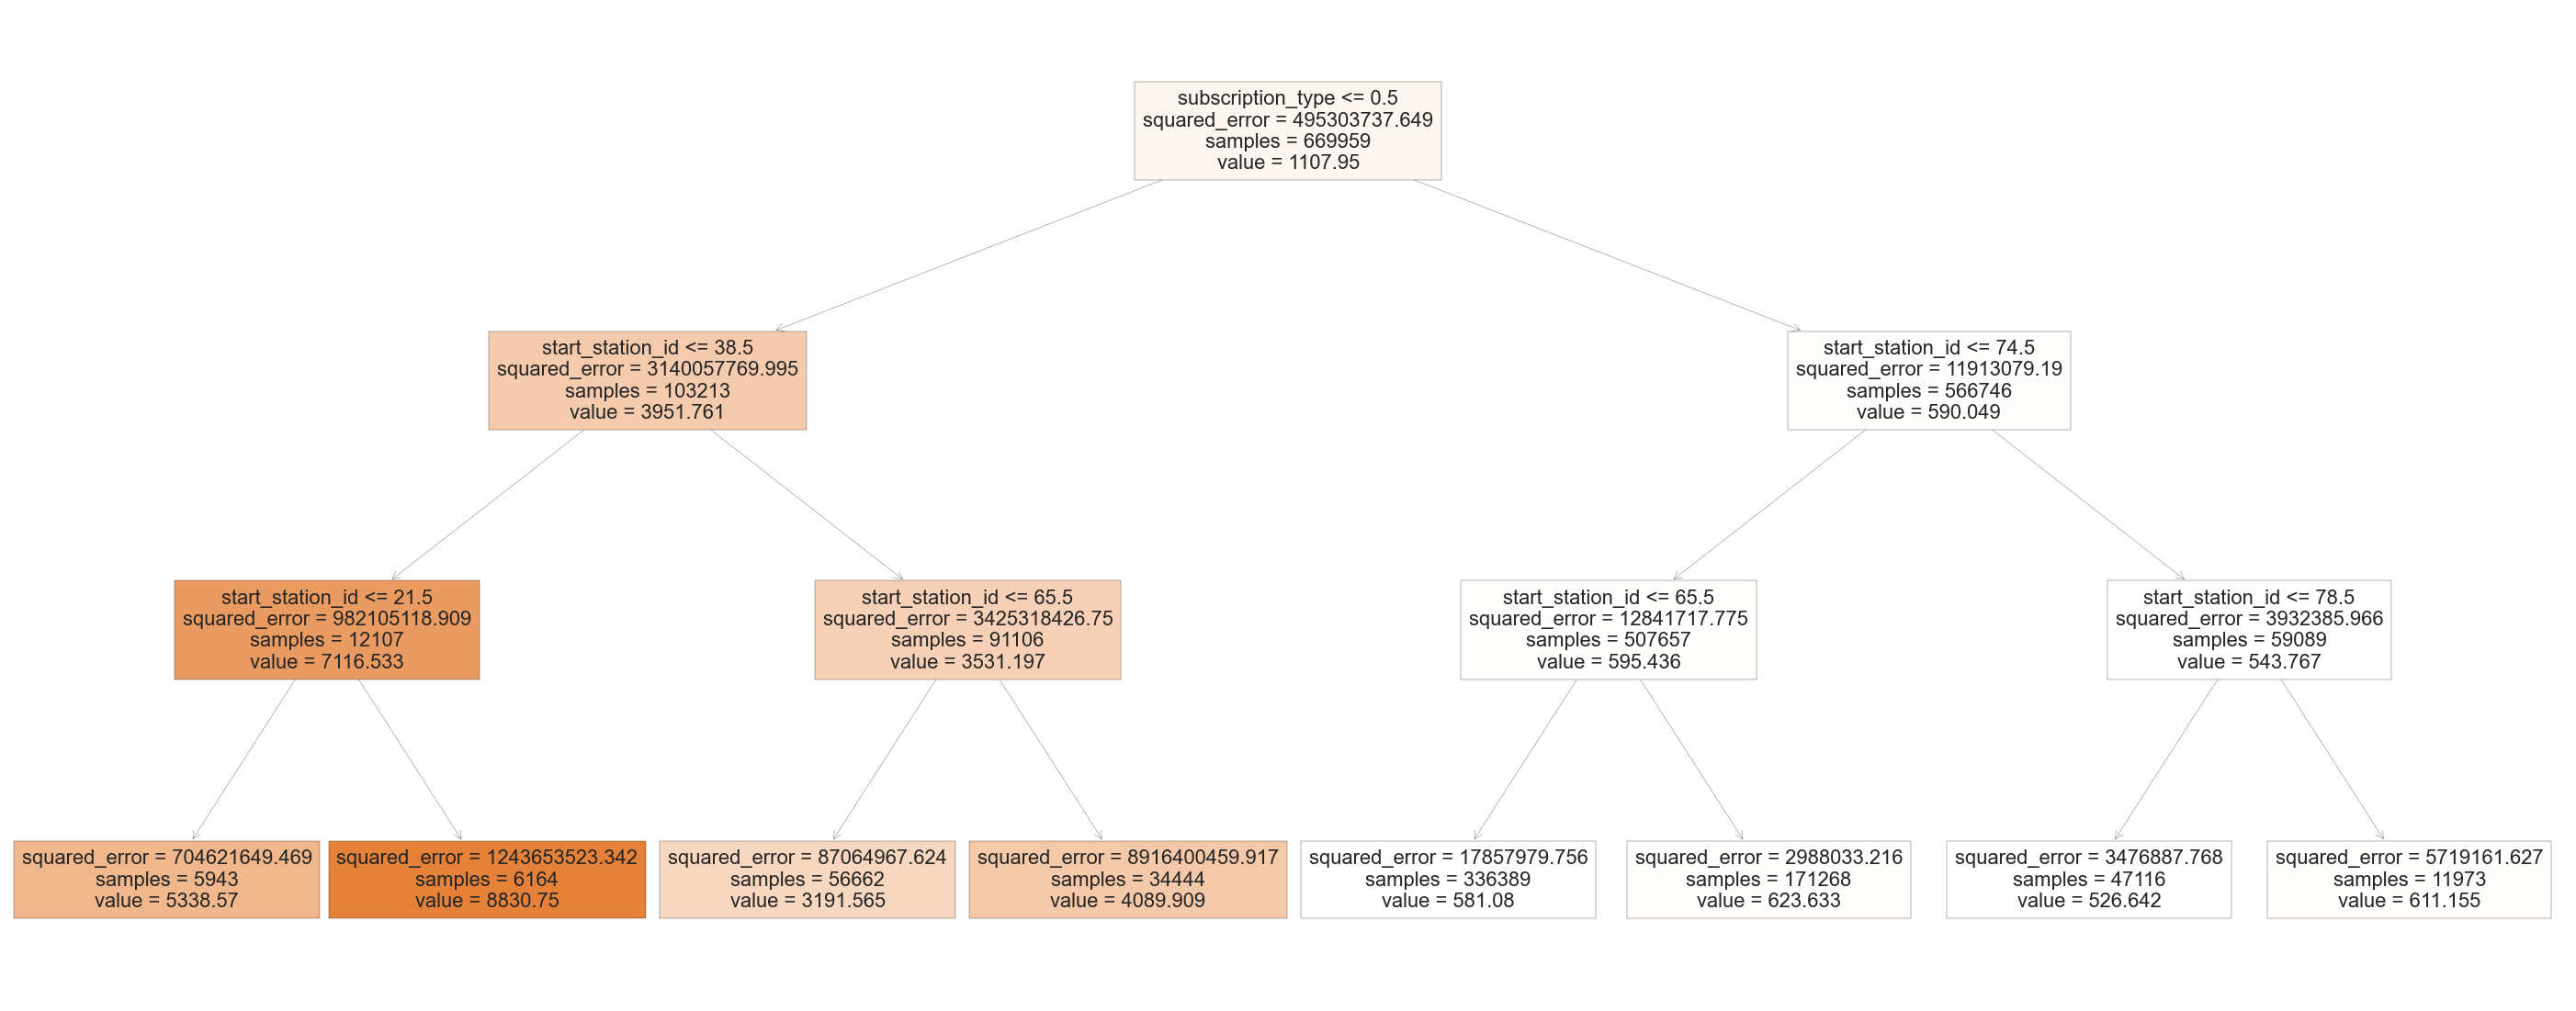

In [38]:
# My variables: start_station_id, "subscription_type. 
## We are not including bike id in our regression tree since in the section OLS Regression we said it is not a
## good estimator that can explain Y significantly. 

X = trip[["start_station_id", "subscription_type"]]
y = trip[["duration"]]

sqft_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X,y)
sqrf_fig = plt.figure(figsize=(50,20))
sqrf_fig = tree.plot_tree(sqft_tree, feature_names=X.columns, filled=True)

### Section 5 -- Interpreting regression tree

At the root node, the prediction crterion is whether the subscription type is less or equal than 0.5 or more (in our case, since subscription type is a dummy variable, it means whether it is 0 or 1, and the content below will say 0 and 1 as well instead of 0.5). If the subscription type is customer (0), if the SSI (start station id) is less than 21.5, the possible duration is around 5538.57 seconds, if it is bigger than 21.5 but smaller than 38.5, the duration is around 8830.75 seconds, if it equals to 21.5, duration is about 7116 seonds. If the SSI is bigger than 38.5 but smaller than 65.5, then the duration is around 3191.565, if it is bigger than 65.5, then the duration is predicted at 3089.909 seconds, if the SSI is equal to 65.6, then SSI maybe 3531.197. 

As for the right node, where it predicts subscriber's behaviour, which is SSI is less then 65.5, duration is approximately 581 seconds, equal to 65.5 is approximately 595.436, and bigger than 65.5 but less than 74.5, the duration is around 595.436. If the SSI is bigger than 78.5, then duration is estimated at 611.155 seconds, if it si equal to 78.5, duration is 543.767, less than 78.5 but more than 74.5 is 526.642. 



### Section 6 -- Errors

As in the section of OLS regression said, our regression model fits our data poorly, and even when it is in the regression model, the stad error is huge, not saying the MSE in the regression tree, since regression tree are from regression. Therefore, our MSEs in the regression trees are huge, and next time we may try different regression models and therefore compute less errored regression tree. 

### Section 7 -- Comparing two models

Compare the output of the regression tree to our Model 4 and Model 5, they are similar results that we can plug number in to OLS regressions to get similar results. However, regression tree categloried our data into groups and estimate them once again. Which can be understanded as a linear regression under a multiple linear regression. As for our OLS estimation, although we can plug every number in to there, but since we are using Big-data, it is slow and hard to calculate them individually and produce a summarize of the output, but this can be clear see from a regression tree, we can know every possibility when plug into different value of the variables using higher depth, but not with OLS regressions. Also, visuallize is important for human, by OLS regression, we need to plot a lot of graphs to visuallize all the regressions, and it is hard to combine them and compare them in a single graph if we have for example 10 regressions. But with regression tree, we get what we need at the end -- the results, easy for us to summarize our finding and use it in out paper. 

## Conclusion and Future work

From above analysis, we can conclude that in San Francisco Bay Area, people use shared- bikes, their duration are correlated with their subscription type and their start station id, bike id may not be a variable that influence durations. According to our results, both of them are negatively correlated with duration, people as customers tend to have longer duration compare to people as subscriber, also people that start with bigger station ids are tend to have shorter duration. 


In the future, what we can improve our research is first, including more variables to explain durations. It is not enough to only include two variables for people’s behaviour, including weather, temperature, whether the station is at downtown or near a school can largely affect people’s decision, therefore, including more X variables will let us explain and understand more of people’s behaviour. Also, one of a major problem of our estimation is our selected model, with further research and more time, later researchers should test more types of linear or non-linear model to fit our data, also, researchers may separate the data for different years of observations to fit every year’s duration, since constructions or road designs can be changed from year to year. 

### Reference:

[1]  Jiawei Zhang, Xiao Pan, Moyin Li, & Yu, P. S. (2016). Bicycle-Sharing System Analysis and Trip Prediction. 2016 17th IEEE International Conference on Mobile Data Management (MDM), 1, 174–179. https://doi.org/10.1109/MDM.2016.35


[2]  Soltani, Mátrai, T., Camporeale, R., & Allan, A. (2019). Exploring Shared-Bike Travel Patterns Using Big Data: Evidence in Chicago and Budapest. In Computational Urban Planning and Management for Smart Cities (pp. 53–68). Springer International Publishing. https://doi.org/10.1007/978-3-030-19424-6_4
